In [1]:
#importing modules and packages
import pandas as pd
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#loading and cleaning Data
titanic_dataset = pd.read_csv("train.csv")
titanic_dataset.shape
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [3]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Encoding Categorial Columns
le = preprocessing.LabelEncoder()
titanic_dataset['Sex'] = le.fit_transform(titanic_dataset['Sex'])
titanic_dataset['Embarked'] = le.fit_transform(titanic_dataset['Embarked'])

In [5]:
#Eleminating unwanted features
work_ds = titanic_dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked']]
para_list = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [15]:
#function
def SVM(Parameter_list):
    DV = []
    AS =[]
    for feature in Parameter_list:
        y = work_ds[feature]
        X= work_ds.drop([feature], axis=1)
        X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
        clf = svm.SVC(gamma= 0.01, C=100)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        Acc_score = accuracy_score(y_test,y_pred,normalize=True)
        print(f"DV = {feature} , Accuracy = {Acc_score}")
        print(confusion_matrix(y_test,y_pred))
        print("\n")
        DV.append(feature)
        AS.append(Acc_score)
        
   
    df = pd.DataFrame ({'Dependent Feature':  DV, 'Accuracy Score': AS })
    return df

In [16]:
result = SVM(para_list)
result

DV = Survived , Accuracy = 0.7415730337078652
[[124  33]
 [ 36  74]]


DV = Pclass , Accuracy = 0.9026217228464419
[[ 64   4   2]
 [  4  36   9]
 [  1   6 141]]


DV = Sex , Accuracy = 0.7265917602996255
[[ 66  32]
 [ 41 128]]


DV = SibSp , Accuracy = 0.7490636704119851
[[150  24   7   0   1   0   0]
 [ 21  39   5   0   0   0   0]
 [  4   1   3   0   0   0   0]
 [  0   2   1   3   1   0   0]
 [  0   0   0   0   2   0   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   2]]


DV = Parch , Accuracy = 0.797752808988764
[[187   6   5   0   0   0]
 [ 21  15   3   0   0   1]
 [ 10   6  11   0   0   0]
 [  0   0   1   0   0   0]
 [  1   0   0   0   0   0]
 [  0   0   0   0   0   0]]


DV = Embarked , Accuracy = 0.7677902621722846
[[ 23   2  24]
 [  0   8  14]
 [ 18   4 174]]




,Dependent Feature,Accuracy Score
0,Survived,0.741573
1,Pclass,0.902622
2,Sex,0.726592
3,SibSp,0.749064
4,Parch,0.797753
5,Embarked,0.767790


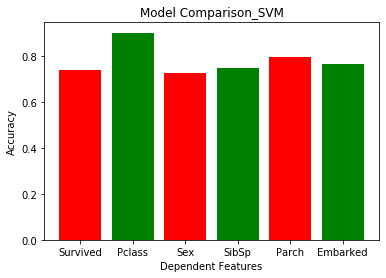

In [17]:
import matplotlib.pyplot as plt
plt.bar(result['Dependent Feature'], result['Accuracy Score'],color = ['red', 'green'])
plt.xlabel('Dependent Features') 
plt.ylabel('Accuracy') 
plt.title('Model Comparison_SVM') 
plt.show()

In [18]:
max = result['Accuracy Score'].max()
best_model = result.loc[result['Accuracy Score'] == max]
print(f"The best model with SVM alogrithm is generated for DV as{best_model['Dependent Feature'].to_string(index = False)} with a model accuracy of{best_model['Accuracy Score'].to_string(index = False)}")

The best model with SVM alogrithm is generated for DV as Pclass with a model accuracy of 0.902622
